In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 

In [4]:
df_index = pd.read_csv("Multiple_Linear_Regression_Data.csv")

In [5]:
df_index.head()

,Year,Month,InterestRate,UnemploymentRate,IndexPrice
0,2006,12,3.98,8.65,3710.26
1,2019,2,1.39,9.27,1066.35
2,2014,10,0.52,5.23,3048.37
3,2010,9,4.17,3.77,1905.98
4,2007,10,3.68,4.60,3580.69


In [6]:
df_index.drop(columns=["Year","Month"],axis=1,inplace=True)

In [7]:
df_index.head()

,InterestRate,UnemploymentRate,IndexPrice
0,3.98,8.65,3710.26
1,1.39,9.27,1066.35
2,0.52,5.23,3048.37
3,4.17,3.77,1905.98
4,3.68,4.60,3580.69


In [8]:
df_index.isnull().sum()

InterestRate        0
UnemploymentRate    0
IndexPrice          0
dtype: int64

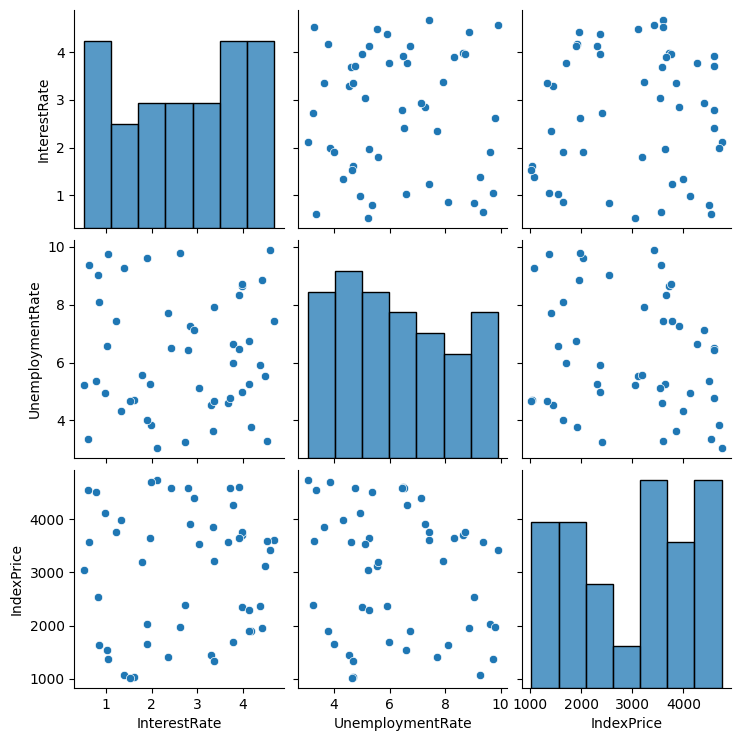

In [9]:
import seaborn as sns
sns.pairplot(df_index)

In [10]:
df_index.corr()

,InterestRate,UnemploymentRate,IndexPrice
InterestRate,1.000000,-0.013068,0.058241
UnemploymentRate,-0.013068,1.000000,-0.177249
IndexPrice,0.058241,-0.177249,1.000000


Text(0, 0.5, 'UnemploymentRate')

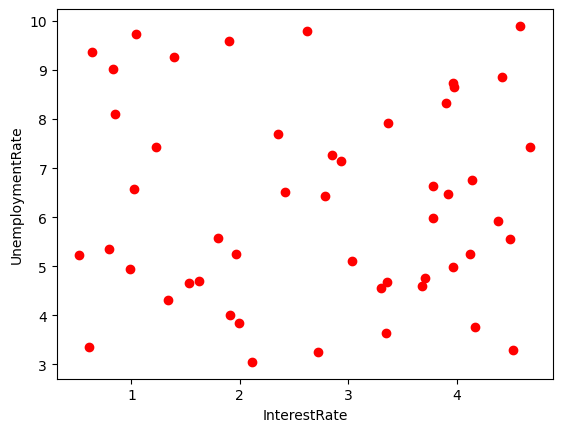

In [11]:
plt.scatter(df_index['InterestRate'],df_index['UnemploymentRate'],color='r')
plt.xlabel("InterestRate")
plt.ylabel("UnemploymentRate")

In [12]:
x=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [13]:
x.head()

,InterestRate,UnemploymentRate
0,3.98,8.65
1,1.39,9.27
2,0.52,5.23
3,4.17,3.77
4,3.68,4.60


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
from sklearn.model_selection import cross_val_score 
validation_score = cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [20]:
validation_score

array([-1372625.36146752, -2022416.28326304, -2023802.23516047,
       -1285077.31232314, -1671398.19915876])

In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1020987.2112756186
908.8370111017492
1010.4391180450302


In [23]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.02012599532997117


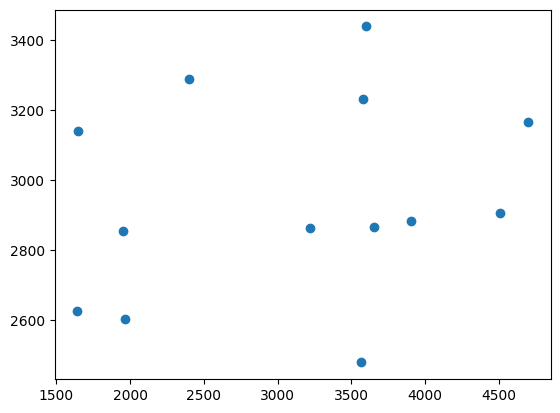

In [24]:
plt.scatter(y_test,y_pred)

In [28]:
residuals = y_test-y_pred

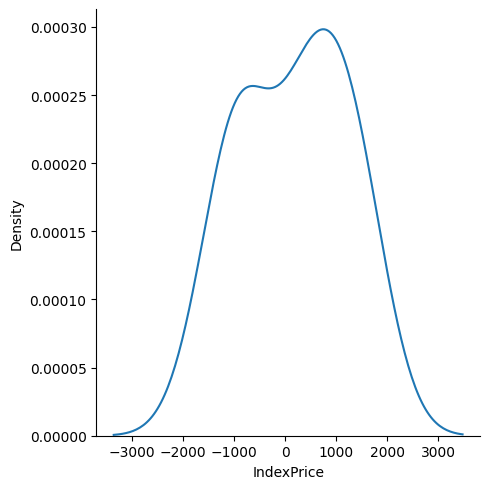

In [29]:
sns.displot(residuals,kind='kde')

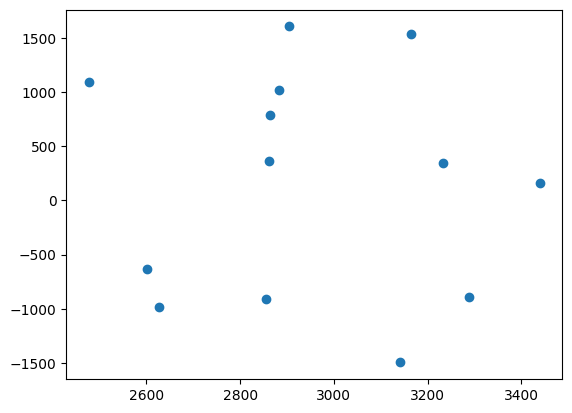

In [30]:
plt.scatter(y_pred,residuals)